<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Desafio_Final_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Fernanda_Monello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Final: Correla√ß√£o e Regress√£o**

Previs√£o de pre√ßos de im√≥veis

In [37]:

# Importando bibliotecas

#Dados
import pandas as pd
import numpy as np
import datetime

#Visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Estat√≠stica
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
from sklearn.preprocessing import PowerTransformer

#Outros
import warnings
warnings.filterwarnings("ignore")


In [3]:
# importando a base de dados partir da URL do id do arquivo compartilhado

id_do_arquivo = "1Sj5KFTBjXKeSY5_F-BO3FnsN-3Erwdum" # ID arquivo kc_house_data.csv
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'

df_house = pd.read_csv(url)

id_do_arquivo = "11rIDsC_68K1eMSsuqeeUcQpw59-uuDgi" # ID arquivo car_price.csv
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'

df_car = pd.read_csv(url)


## **Explora√ß√£o do dataset (ETL) - kc_house_data.csv**

In [4]:
df_house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0          n     0  ...      7        1180              0   
1      7242     2.0          n     0  ...      7        2170            400   
2     10000     1.0          n     0  ...      6         770              0   
3      5000     1.0          n     0  ...      7        1050            910   
4      8080     1.0          n     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
#Excluimdo coluna id, n√£o necess√°ria para a an√°lise
df_house.drop(columns=['id'], inplace=True)
df_house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0          n     0          3      7        1180              0   
1     2.0          n     0          3      7        2170            400   
2     1.0          n     0          3      6         770              0   
3     1.0          n     0          5      7        1050            910   
4     1.0          n     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [6]:
df_house.shape

(9999, 20)

In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9999 non-null   object 
 1   price          9999 non-null   float64
 2   bedrooms       9999 non-null   int64  
 3   bathrooms      9999 non-null   float64
 4   sqft_living    9999 non-null   int64  
 5   sqft_lot       9999 non-null   int64  
 6   floors         9999 non-null   float64
 7   waterfront     9999 non-null   object 
 8   view           9999 non-null   int64  
 9   condition      9999 non-null   int64  
 10  grade          9999 non-null   int64  
 11  sqft_above     9999 non-null   int64  
 12  sqft_basement  9999 non-null   int64  
 13  yr_built       9999 non-null   int64  
 14  yr_renovated   9999 non-null   int64  
 15  zipcode        9999 non-null   int64  
 16  lat            9999 non-null   float64
 17  long           9999 non-null   float64
 18  sqft_liv

In [8]:
# Convers√£o de dados

# convers√£o de coluna date
df_house['date'] = pd.to_datetime(df_house['date'])

# convers√£o colunas bathrooms,  floors para inteiro
df_house['bathrooms'] = df_house['bathrooms'].astype(int)
df_house['floors'] = df_house['floors'].astype(int)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9999 non-null   datetime64[ns]
 1   price          9999 non-null   float64       
 2   bedrooms       9999 non-null   int64         
 3   bathrooms      9999 non-null   int64         
 4   sqft_living    9999 non-null   int64         
 5   sqft_lot       9999 non-null   int64         
 6   floors         9999 non-null   int64         
 7   waterfront     9999 non-null   object        
 8   view           9999 non-null   int64         
 9   condition      9999 non-null   int64         
 10  grade          9999 non-null   int64         
 11  sqft_above     9999 non-null   int64         
 12  sqft_basement  9999 non-null   int64         
 13  yr_built       9999 non-null   int64         
 14  yr_renovated   9999 non-null   int64         
 15  zipcode        9999 n

In [9]:
#vrificando dados nulos
df_house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Resumo das estatisticas do dataset
df_house.drop(columns=['date']).describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  9.999000e+03  9999.000000  9999.000000   9999.000000  9.999000e+03   
mean   5.334366e+05     3.361636     1.703770   2053.088209  1.603696e+04   
std    3.770547e+05     0.916079     0.728809    911.227082  4.504326e+04   
min    7.500000e+04     0.000000     0.000000    380.000000  5.720000e+02   
25%    3.150000e+05     3.000000     1.000000   1410.000000  5.427500e+03   
50%    4.458380e+05     3.000000     2.000000   1890.000000  7.920000e+03   
75%    6.399500e+05     4.000000     2.000000   2500.000000  1.117550e+04   
max    7.700000e+06    11.000000     8.000000  12050.000000  1.651359e+06   

            floors         view    condition        grade   sqft_above  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      1.380638     0.238824     3.446345     7.594459  1749.596360   
std       0.520561     0.766738     0.666322     1.165901   810.917694   
min       1.000000     0.000000     1.000000     3.000000   380.000000   
25%       1.000000     0.000000     3.000000     7.000000  1180.000000   
50%       1.000000     0.000000     3.000000     7.000000  1530.000000   
75%       2.000000     0.000000     4.000000     8.000000  2130.000000   
max       3.000000     4.000000     5.000000    13.000000  8860.000000   

       sqft_basement     yr_built  yr_renovated       zipcode          lat  \
count    9999.000000  9999.000000   9999.000000   9999.000000  9999.000000   
mean      303.491849  1967.274427     91.642364  98077.970297    47.559852   
std       450.852334    27.988987    417.830430     53.943113     0.140048   
min         0.000000  1900.000000      0.000000  98001.000000    47.155900   
25%         0.000000  1950.000000      0.000000  98032.000000    47.461950   
50%         0.000000  1969.000000      0.000000  98065.000000    47.573100   
75%       600.000000  1990.000000      0.000000  98118.000000    47.679400   
max      4820.000000  2015.000000   2015.000000  98199.000000    47.777600   

              long  sqft_living15     sqft_lot15  
count  9999.000000    9999.000000    9999.000000  
mean   -122.214626    1975.779178   13359.446945  
std       0.139017     672.264191   27316.491648  
min    -122.515000     620.000000     660.000000  
25%    -122.326000    1490.000000    5417.500000  
50%    -122.231000    1830.000000    7848.000000  
75%    -122.126500    2340.000000   10374.500000  
max    -121.315000    5790.000000  871200.000000



> ‚ö† **Aqui podemos verificar que a nossa vari√°vel target price tem uma escala bem maior que os demais dados, sendo recomend√°vel realizar transforma√ß√µes n√£o lineares. Contudo, vamos avaliar inicialmente os gr√°ficos para avaliar qual a melhor transforma√ß√£o e se h√° necessidade de aplic√°-la a mais alguma v√°riavel de interesse tal qual: sqft_living, sqft_lot, sqft_above e sqft_basement**



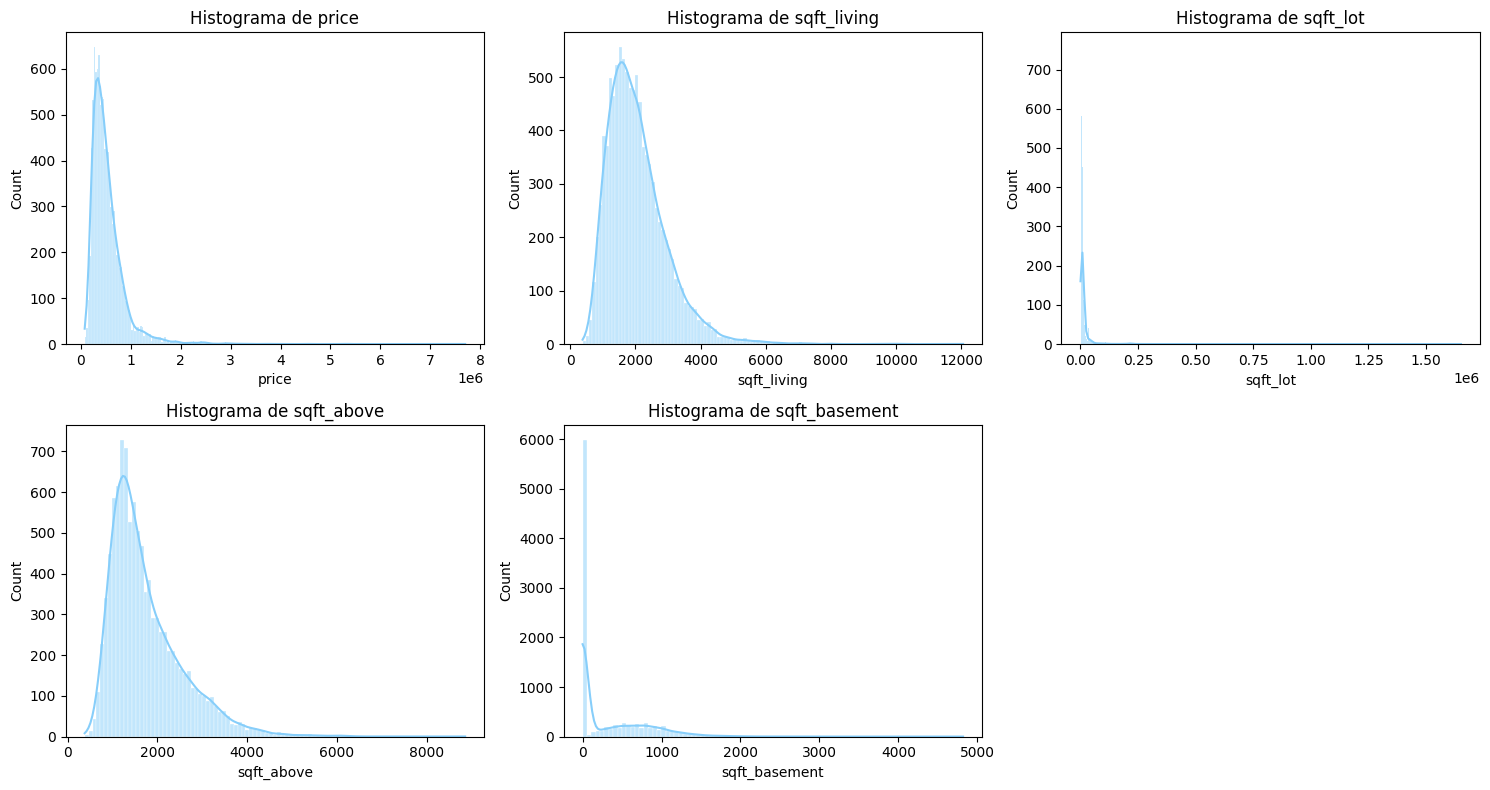

In [11]:
# Avaiando o formato das curvas dos histogramas das variaveis price, sqft_living, sqft_lot, sqft_above e sqft_basement

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# varifica caad uma das vari√°veis para cria√ß√£o do gr√°fico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda h√° subplots
        sns.histplot(df_house[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots n√£o utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


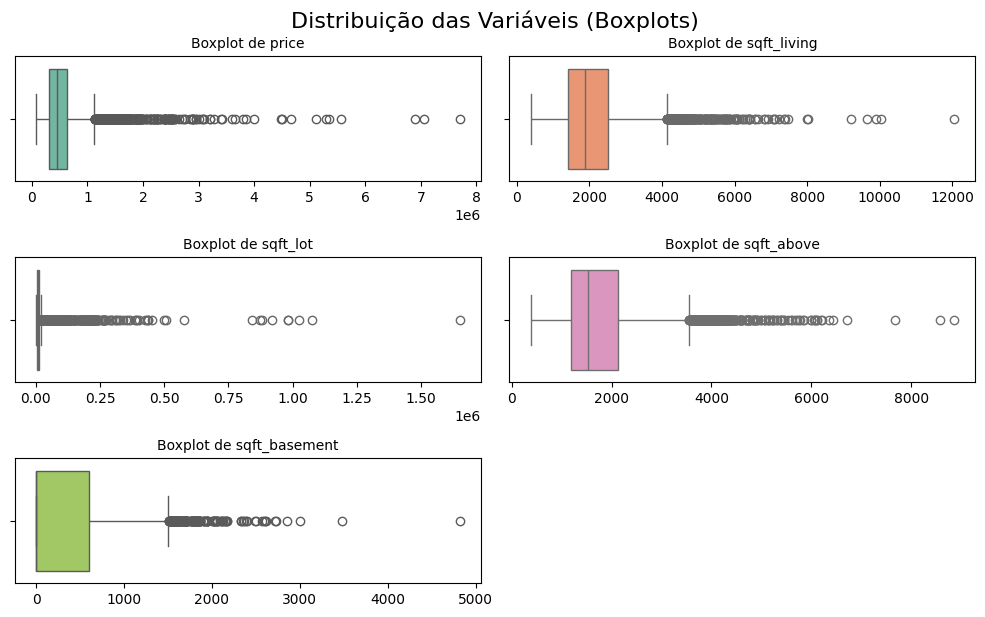

In [12]:
# Vari√°veis e cores
variables = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
colors = sns.color_palette("Set2", len(variables))

# Criando subplots em grade 3x2 (com espa√ßo para at√© 6 vari√°veis)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
axes = axes.flatten()  # Transforma em lista para indexar facilmente

# Criando os boxplots
for i, var in enumerate(variables):
    sns.boxplot(x=df_house[var], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot de {var}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remover eixo extra n√£o utilizado (posi√ß√£o 6)
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Ajuste de layout
plt.tight_layout()
plt.suptitle("Distribui√ß√£o das Vari√°veis (Boxplots)", fontsize=16, y=1.02)
plt.show()




> ‚ñ∂ **Podemos confirmar atrav√©s dos histogramas que os dados apresentam assimetria, sendo recomendada a aplica√ß√£o de transforma√ß√µes n√£o lineares. Al√©m disso, o boxplot indica presen√ßa de outliers nas vari√°veis, que podem influenciar na analise.**



In [13]:

# Aplicando transforma√ß√µes logar√≠tmicas (adiciona +1 para evitar log(0))
df_house['log_price'] = np.log(df_house['price'])
df_house['log_sqft_living'] = np.log(df_house['sqft_living'])
df_house['log_sqft_lot'] = np.log(df_house['sqft_lot'])
df_house['log_sqft_above'] = np.log(df_house['sqft_above'])
df_house['log_sqft_basement'] = np.log(df_house['sqft_basement'])

# transformar ano em "idade da casa"
df_house['house_age'] = 2025 - df_house['yr_built']


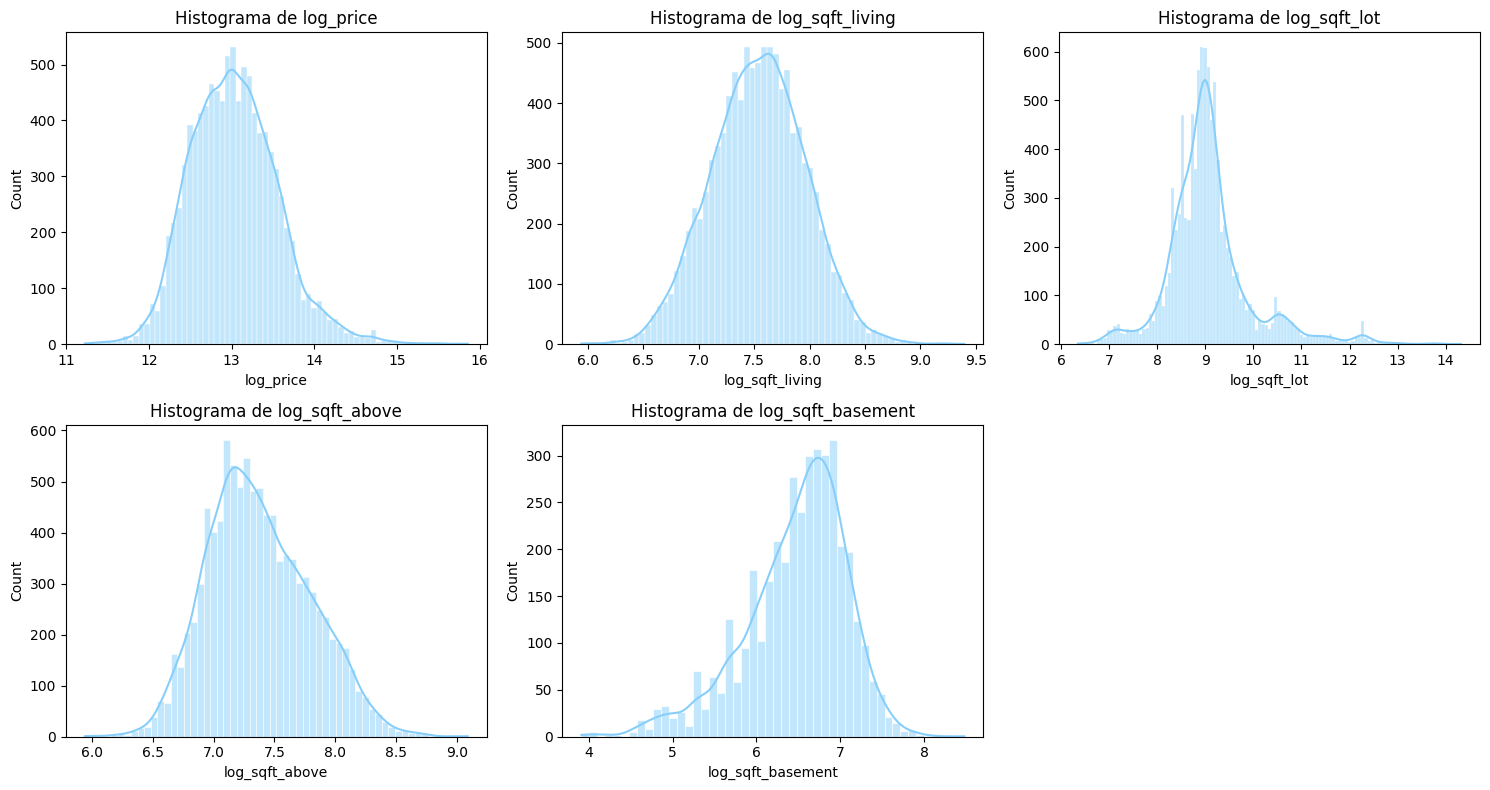

In [14]:
# Avaiando o formato das curvas dos histogramas das variaveis price, sqft_living, sqft_lot, sqft_above e sqft_basement

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['log_price', 'log_sqft_living', 'log_sqft_lot','log_sqft_above', 'log_sqft_basement']

# varifica caad uma das vari√°veis para cria√ß√£o do gr√°fico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda h√° subplots
        sns.histplot(df_house[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots n√£o utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Quest√£o 1

Codifique e exiba a matriz de correla√ß√£o entre as vari√°veis num√©ricas.
Al√©m disso, qual √© a correla√ß√£o entre o pre√ßo price e o n√∫mero de
quartos bedrooms? Existe alguma diferen√ßa na correla√ß√£o quando
consideramos apenas casas com uma √°rea total sqft_living superior a
2000 p√©s quadrados?

### **Matriz de Correla√ß√£o**

Correla√ß√£o com o Pre√ßo (normalizado):
bedrooms             0.339992
bathrooms            0.507253
sqft_living          0.689118
sqft_lot             0.106508
floors               0.299405
view                 0.350063
condition            0.055714
grade                0.693329
sqft_above           0.598629
sqft_basement        0.316078
yr_built             0.055001
yr_renovated         0.128458
zipcode             -0.044108
lat                  0.455307
long                 0.040045
sqft_living15        0.628375
sqft_lot15           0.104223
log_sqft_living      0.667759
log_sqft_lot         0.146478
log_sqft_above       0.583121
log_sqft_basement    0.338800
house_age           -0.055001
Name: log_price, dtype: float64


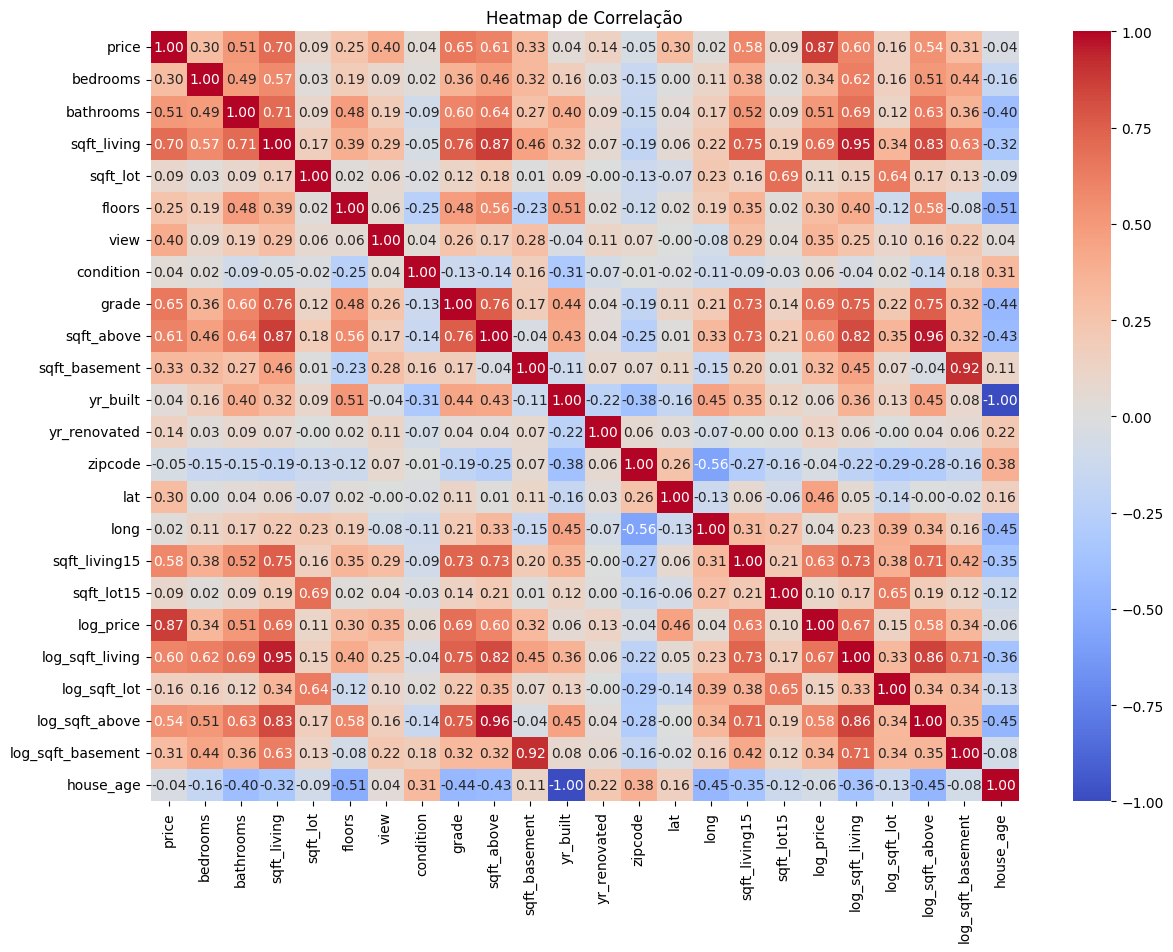

In [15]:
# Correla√ß√£o de todas as vari√°veis num√©ricas com 'price'

# Selecionando apenas colunas num√©ricas para o c√°lculo da correla√ß√£o
numerical_df = df_house.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

price_correlation = correlation_matrix['log_price'].drop(index=['log_price','price'])

print("Correla√ß√£o com o Pre√ßo (normalizado):")
print(price_correlation)

# Heatmap de correla√ß√£o
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correla√ß√£o')
plt.show()




### Correla√ß√£o entre pre√ßo (normalizado) e bedrooms

In [16]:
#filtrando correla√ß√£o entre log_price e bedrooms
cor_bedrooms = correlation_matrix.loc['log_price', 'bedrooms']
print(f"Correla√ß√£o entre log_price e bedrooms: {cor_bedrooms:.4f}")

Correla√ß√£o entre log_price e bedrooms: 0.3400


### Diferen√ßa na correla√ß√£o de pre√ßo normalizado considerando sqft_living (√Årea interna √∫til da casa) superior a 2000 p√©s quadrados

In [17]:
# Verificando se h√° diferen√ßa na correla√ß√£o quando consideramos apenas casas com uma √°rea total sqft_living superior a 2000 p√©s quadrados

# Filtrando casas com sqft_living > 2000
df_filtrado = df_house[df_house['sqft_living'] > 2000]

# Recalculando a matriz de correla√ß√£o para o conjunto filtrado
num_df_filtrado = df_filtrado.select_dtypes(include=np.number)
correlation_matrix_filtro = num_df_filtrado.corr()

# Correla√ß√£o entre log_price e bedrooms no conjunto filtrado
cor_bedrooms_filtered = correlation_matrix_filtro.loc['log_price', 'bedrooms']

print(f"Correla√ß√£o entre log_price e bedrooms (sqft_living > 2000): {cor_bedrooms_filtered:.4f}")

# Comparando as correla√ß√µes
print(f"Diferen√ßa na correla√ß√£o: {cor_bedrooms - cor_bedrooms_filtered:.4f}")


Correla√ß√£o entre log_price e bedrooms (sqft_living > 2000): 0.0939
Diferen√ßa na correla√ß√£o: 0.2461


## Quest√£o 2

Existe alguma correla√ß√£o entre o pre√ßo price e a √°rea total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [18]:
# Filtrar casas com pelo menos 2 banheiros
df_bath2 = df_house[df_house['bathrooms'] >= 2]

# Calcular a correla√ß√£o entre pre√ßo e √°rea (original e transformada)
cor_price_sqft = df_bath2['price'].corr(df_bath2['sqft_living'])
cor_log_price_log_sqft = df_bath2['log_price'].corr(df_bath2['log_sqft_living'])

print(f"Correla√ß√£o entre price e sqft_living (com bathrooms >= 2): {cor_price_sqft:.4f}")
print(f"Correla√ß√£o entre log_price e log_sqft_living (com bathrooms >= 2): {cor_log_price_log_sqft:.4f}")


Correla√ß√£o entre price e sqft_living (com bathrooms >= 2): 0.7067
Correla√ß√£o entre log_price e log_sqft_living (com bathrooms >= 2): 0.6754


## Quest√£o 3

Como a quantidade de banheiros bathrooms influencia na correla√ß√£o
entre a √°rea total da casa sqft_living e o pre√ßo price?

In [19]:
# Criar um dicion√°rio para armazenar as correla√ß√µes
correlations_by_bathrooms = {}

# Percorrer cada quantidade √∫nica de banheiros
for b in sorted(df_house['bathrooms'].unique()):
    subset = df_house[df_house['bathrooms'] == b]
    if len(subset) >= 30:  # Garantir n√∫mero m√≠nimo de casas para dar robustez √† correla√ß√£o
        corr = subset['sqft_living'].corr(subset['log_price'])
        correlations_by_bathrooms[b] = corr

# Exibir resultados
print("Correla√ß√£o entre sqft_living e log_price por n√∫mero de banheiros:")
for baths, corr in correlations_by_bathrooms.items():
    print(f"{baths} banheiros: correla√ß√£o = {corr:.4f}")



Correla√ß√£o entre sqft_living e log_price por n√∫mero de banheiros:
0 banheiros: correla√ß√£o = 0.5939
1 banheiros: correla√ß√£o = 0.4433
2 banheiros: correla√ß√£o = 0.5842
3 banheiros: correla√ß√£o = 0.6302
4 banheiros: correla√ß√£o = 0.6448


In [20]:
#Visualiza√ß√£o gr√°fica

plt.figure(figsize=(8, 3))
plt.plot(list(correlations_by_bathrooms.keys()), list(correlations_by_bathrooms.values()), marker='o')
plt.title('Varia√ß√£o da Correla√ß√£o (sqft_living vs price) por N¬∫ de Banheiros')
plt.xlabel('N√∫mero de Banheiros')
plt.ylabel('Correla√ß√£o')
plt.grid(True)
plt.show()

## **Quest√£o 4**

Qual √© a rela√ß√£o entre a condi√ß√£o da casa condition e o pre√ßo price,
considerando apenas casas com uma √°rea total sqft_living superior a
3000 p√©s quadrados?

In [21]:
# Filtrar casas com sqft_living > 3000
df_big = df_house[df_house['sqft_living'] > 3000]

# Agrupar por condi√ß√£o e calcular estat√≠sticas
condition_price_stats = df_big.groupby('condition')['log_price'].agg(['mean', 'median', 'count']).sort_index()

print("Estat√≠sticas de pre√ßo por condi√ß√£o da casa (apenas casas > 3000 sqft):")
print(condition_price_stats)



Estat√≠sticas de pre√ßo por condi√ß√£o da casa (apenas casas > 3000 sqft):
                mean     median  count
condition                             
2          13.461888  13.461888      2
3          13.703615  13.655048    944
4          13.742246  13.687677    269
5          13.949482  14.006131    101


In [22]:

# Criar listas de pre√ßos por condi√ß√£o
groups = [df_big[df_big['condition'] == c]['price'] for c in sorted(df_big['condition'].unique())]

# Teste ANOVA
anova_result = f_oneway(*groups)

print(f"ANOVA F={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4e}")

if anova_result.pvalue < 0.05:
    print("H√° diferen√ßa estat√≠stica significativa entre os pre√ßos m√©dios das diferentes condi√ß√µes, ou seja a condi√ß√£o da casa √© relevante para o pre√ßo.")
else:
    print("N√£o h√° diferen√ßa estat√≠stica significativa entre os pre√ßos m√©dios das diferentes condi√ß√µes, ou seja, a condi√ß√£o da casa n√£o √© relevante para o pre√ßo.")

ANOVA F=5.4687, p-value=9.7933e-04
H√° diferen√ßa estat√≠stica significativa entre os pre√ßos m√©dios das diferentes condi√ß√µes, ou seja a condi√ß√£o da casa √© relevante para o pre√ßo.


## **Quest√£o 5**

Existe alguma correla√ß√£o entre a localiza√ß√£o geogr√°fica lat e long e o
pre√ßo price para casas com pelo menos tr√™s quartos bedrooms?



> ** Nessa quest√£o, a latitude e longitude individualmente n√£o ir√£o capiturar bem a influ√™ncia da localiza√ß√£o geogr√°fica no pre√ßo uma vez que, por serem coordenadas, s√≥  t√™m  significado quando combinadas. Neste caso, para uma avalia√ß√£o mais precisa da correla√ß√£o, o dado ser√° clusterizado, a a analise ser√° feita com base na m√©dia dos dados de cada cluster**



                  mean  count
geo_cluster                  
0            13.419162   2044
2            13.264971   2395
3            13.240367    962
4            12.670194   1698
1            12.652347   1513


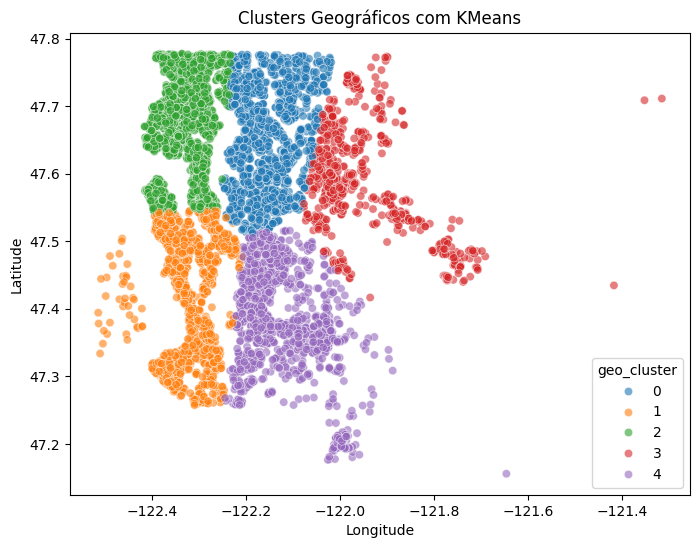

In [23]:
# Filtrar casas com 3 ou mais quartos
df_bedrooms3plus = df_house[df_house['bedrooms'] >= 3]

# Usar apenas latitude e longitude
coords = df_bedrooms3plus[['lat', 'long']]

# Definir n√∫mero de clusters (ex: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_bedrooms3plus['geo_cluster'] = kmeans.fit_predict(coords)

# Ver pre√ßo m√©dio por cluster
cluster_prices = df_bedrooms3plus.groupby('geo_cluster')['log_price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(cluster_prices)

# Plotando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bedrooms3plus, x='long', y='lat', hue='geo_cluster', palette='tab10', alpha=0.6)
plt.title('Clusters Geogr√°ficos com KMeans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [24]:

# ANOVA: pre√ßo ~ cluster geogr√°fico
model = ols('log_price ~ C(geo_cluster)', data=df_bedrooms3plus).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print("Resultado da ANOVA entre geo_cluster e price:")
print(anova_result)


Resultado da ANOVA entre geo_cluster e price:
                     sum_sq      df            F  PR(>F)
C(geo_cluster)   903.359281     4.0  1316.986775     0.0
Residual        1475.947496  8607.0          NaN     NaN


> **üîç Interpreta√ß√£o do Resultado**
* **F = 1316.99 (muito alto)**
* **p-valor (PR(>F)) = 0.0 (menor que 0.05)**
* **df (graus de liberdade) = 4 (entre grupos) e df= 8607 (res√≠duo)**
* **Conclus√£o estat√≠stica	Rejeita-se H‚ÇÄ: os grupos t√™m m√©dias diferentes de pre√ßo**

**‚úÖ Conclus√£o: A localiza√ß√£o geogr√°fica (representada pelos clusters criados a partir de lat e long) influencia significativamente o pre√ßo das casas.**





## **Quest√£o 6**

Calcule a correla√ß√£o entre uma vari√°vel categ√≥rica(waterfront) e uma
vari√°vel num√©rica(price) usando ANOVA.

In [25]:
# ANOVA: pre√ßo ~ presen√ßa de waterfront
model = ols('log_price ~ C(waterfront)', data=df_house).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print("Resultado da ANOVA entre waterfront e price:")
print(anova_result)


Resultado da ANOVA entre waterfront e price:
                    sum_sq      df           F        PR(>F)
C(waterfront)   101.016603     1.0  376.387013  2.458235e-82
Residual       2683.044171  9997.0         NaN           NaN


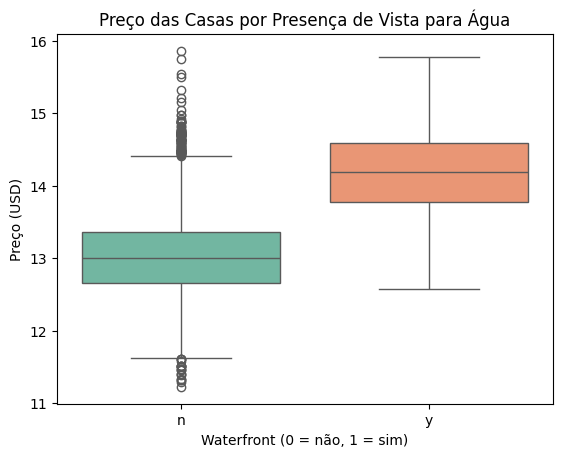

In [26]:
#Visualiza√ß√£o da m√©dia dos valores para os dois grupos
sns.boxplot(x='waterfront', y='log_price', data=df_house, palette="Set2")
plt.title("Pre√ßo das Casas por Presen√ßa de Vista para √Ågua")
plt.xlabel("Waterfront (0 = n√£o, 1 = sim)")
plt.ylabel("Pre√ßo (USD)")
plt.show()


>  **üîç Interpreta√ß√£o do Resultado**
* **F-valor	376.39 (muito alto)**
* **p-valor (PR(>F))	2.46 √ó 10‚Åª‚Å∏¬≤ (quase zero)**
* **Conclus√£o estat√≠stica	Rejeita-se H‚ÇÄ ‚Äì h√° diferen√ßa significativa**

**‚úÖ Conclus√£o:Casas com vista para a √°gua t√™m pre√ßos significativamente diferentes do que casas sem essa caracter√≠stica. Atrav√©s da an√°lise das m√©dias dos dois grupos, pode-se notar que casas com waterfont, apresentam mediana de pre√ßos superior**


## **Explora√ß√£o do dataset (ETL) - car_prices.csv**

In [27]:
df_car.head(3)

Make                 Model   Price  Year  Kilometer Fuel Type  \
0          Honda   Amaze 1.2 VX i-VTEC  505000  2017      87150    Petrol   
1  Maruti Suzuki       Swift DZire VDI  450000  2014      75000    Diesel   
2        Hyundai  i10 Magna 1.2 Kappa2  220000  2011      67000    Petrol   

  Transmission  Location   Color   Owner Seller Type   Engine  \
0       Manual      Pune    Grey   First   Corporate  1198 cc   
1       Manual  Ludhiana   White  Second  Individual  1248 cc   
2       Manual   Lucknow  Maroon   First  Individual  1197 cc   

           Max Power              Max Torque Drivetrain  Length   Width  \
0  87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0  1680.0   
1  74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0  1695.0   
2  79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0  1595.0   

   Height  Seating Capacity  Fuel Tank Capacity  
0  1505.0               5.0                35.0  
1  1555.0               5.0                42.0  
2  1550.0               5.0                35.0

In [28]:
df_car.shape

(1874, 20)

In [29]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [30]:
#convertendo variaveis year em categ√≥rica e Sating capacity em int

df_car['Year'] = df_car['Year'].astype(str)
df_car['Seating Capacity'] = df_car['Seating Capacity'].astype(int)

# Criando coluna de idade do vaiculo
current_year = datetime.datetime.now().year
df_car['Age'] = current_year - df_car['Year'].astype(int)

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   object 
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [31]:
# verificando dados nulos
df_car.isnull().sum()


Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Age                   0
dtype: int64

In [32]:
#Resumo das estatisticas do dataframe

df_car.describe()

Price     Kilometer       Length        Width       Height  \
count  1.874000e+03  1.874000e+03  1874.000000  1874.000000  1874.000000   
mean   1.718279e+06  5.317814e+04  4281.512807  1767.886339  1588.967983   
std    2.426090e+06  5.878833e+04   436.220747   131.344883   134.627659   
min    4.900000e+04  0.000000e+00  3099.000000  1475.000000  1213.000000   
25%    5.000000e+05  2.801975e+04  3985.000000  1695.000000  1485.000000   
50%    8.424995e+05  4.879750e+04  4360.000000  1770.000000  1544.000000   
75%    1.908250e+06  7.100000e+04  4620.000000  1831.000000  1670.750000   
max    3.500000e+07  2.000000e+06  5569.000000  2220.000000  1995.000000   

       Seating Capacity  Fuel Tank Capacity          Age  
count       1874.000000         1874.000000  1874.000000  
mean           5.295091           52.217343     8.286553  
std            0.807008           15.167250     3.138477  
min            2.000000           15.000000     3.000000  
25%            5.000000           42.000000     6.000000  
50%            5.000000           50.000000     8.000000  
75%            5.000000           60.000000    10.000000  
max            8.000000          105.000000    37.000000

> ‚ö† **Aqui podemos verificar que a nossa vari√°vel target price tem uma escala bem maior que os demais dados, sendo recomend√°vel realizar transforma√ß√µes n√£o lineares. Contudo, vamos avaliar inicialmente os gr√°ficos para avaliar qual a melhor transforma√ß√£o**

In [40]:
# Avaiando o formato das curvas dos histogramas das variaveis price e Kilometer

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['Price', 'Kilometer']

# varifica caad uma das vari√°veis para cria√ß√£o do gr√°fico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda h√° subplots
        sns.histplot(df_car[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots n√£o utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


> ‚ñ∂ **Podemos confirmar atrav√©s dos histogramas que os dados apresentam assimetria, sendo recomendada a aplica√ß√£o de transforma√ß√µes n√£o lineares. Al√©m disso, o boxplot indica presen√ßa de outliers nas vari√°veis, que podem influenciar na analise.**

In [34]:
# Aplicando transforma√ß√µes logar√≠tmicas (adiciona +1 para evitar log(0))
df_car['log_price'] = np.log(df_car['Price'])

pt = PowerTransformer(method='yeo-johnson')
df_car['yeoj_kilometer'] = pt.fit_transform(df_car[['Kilometer']])


In [41]:
# Revisando o formato das curvas dos histogramas das variaveis transformadas

# Criando os subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Ajustando eixo
axes = axes.flatten()

# Define the variables to plot
variables = ['log_price', 'yeoj_kilometer']

# varifica caad uma das vari√°veis para cria√ß√£o do gr√°fico
for i, var in enumerate(variables):
    if i < len(axes):  # verifica se ainda h√° subplots
        sns.histplot(df_car[var], ax=axes[i], kde=True, color='lightskyblue', edgecolor='white')
        axes[i].set_title(f'Histograma de {var}')

# Remove subplots n√£o utilizados
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## **Quest√£o 7:**

Codifique e exiba a matriz de correla√ß√£o para as vari√°veis num√©ricas e d√™ exemplos de correla√ß√µes positivas, negativas e neutras.

In [43]:
# Selecionando apenas colunas num√©ricas
numerical_car = df_car.select_dtypes(include=np.number)

# Calculando matriz de correla√ß√£o
correlation_car = numerical_car.corr()

# Exibindo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_car, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o - Carros')
plt.show()



> ‚úÖ**Conclus√£o: Como exemplo de correla√ß√µes positivas temos Pprice e log_price (pre√ßo normalizado) e Length, apresentando respectivamente corre√ß√£o de 0,57  e 0,77. O mesmo para as duas variaveis em rela√ß√£o √† Width, 0,58 em rela√ß√£o √† Price e 0,78 em rela√ß√£o a log_price (pre√ßo normalizado).
Corre√ß√£o negativa forte temos Age (idade do veiculo) e log_price (pre√ßo normalizado) e moderada entre log_price(pre√ßo normalizado) e yeoj_kilometer (kilometer normalizado)
O conjunto de dados apresenta como correla√ß√£o nula o n√∫mero de acentos (Seating capacity) e Age (idade do ve√≠culo)**



# **Quest√£o 8**
Codifique e exiba Gr√°ficos de Dispers√£o para cada uma das vari√°veis num√©ricas em rela√ß√£o √† vari√°vel de interesse Price

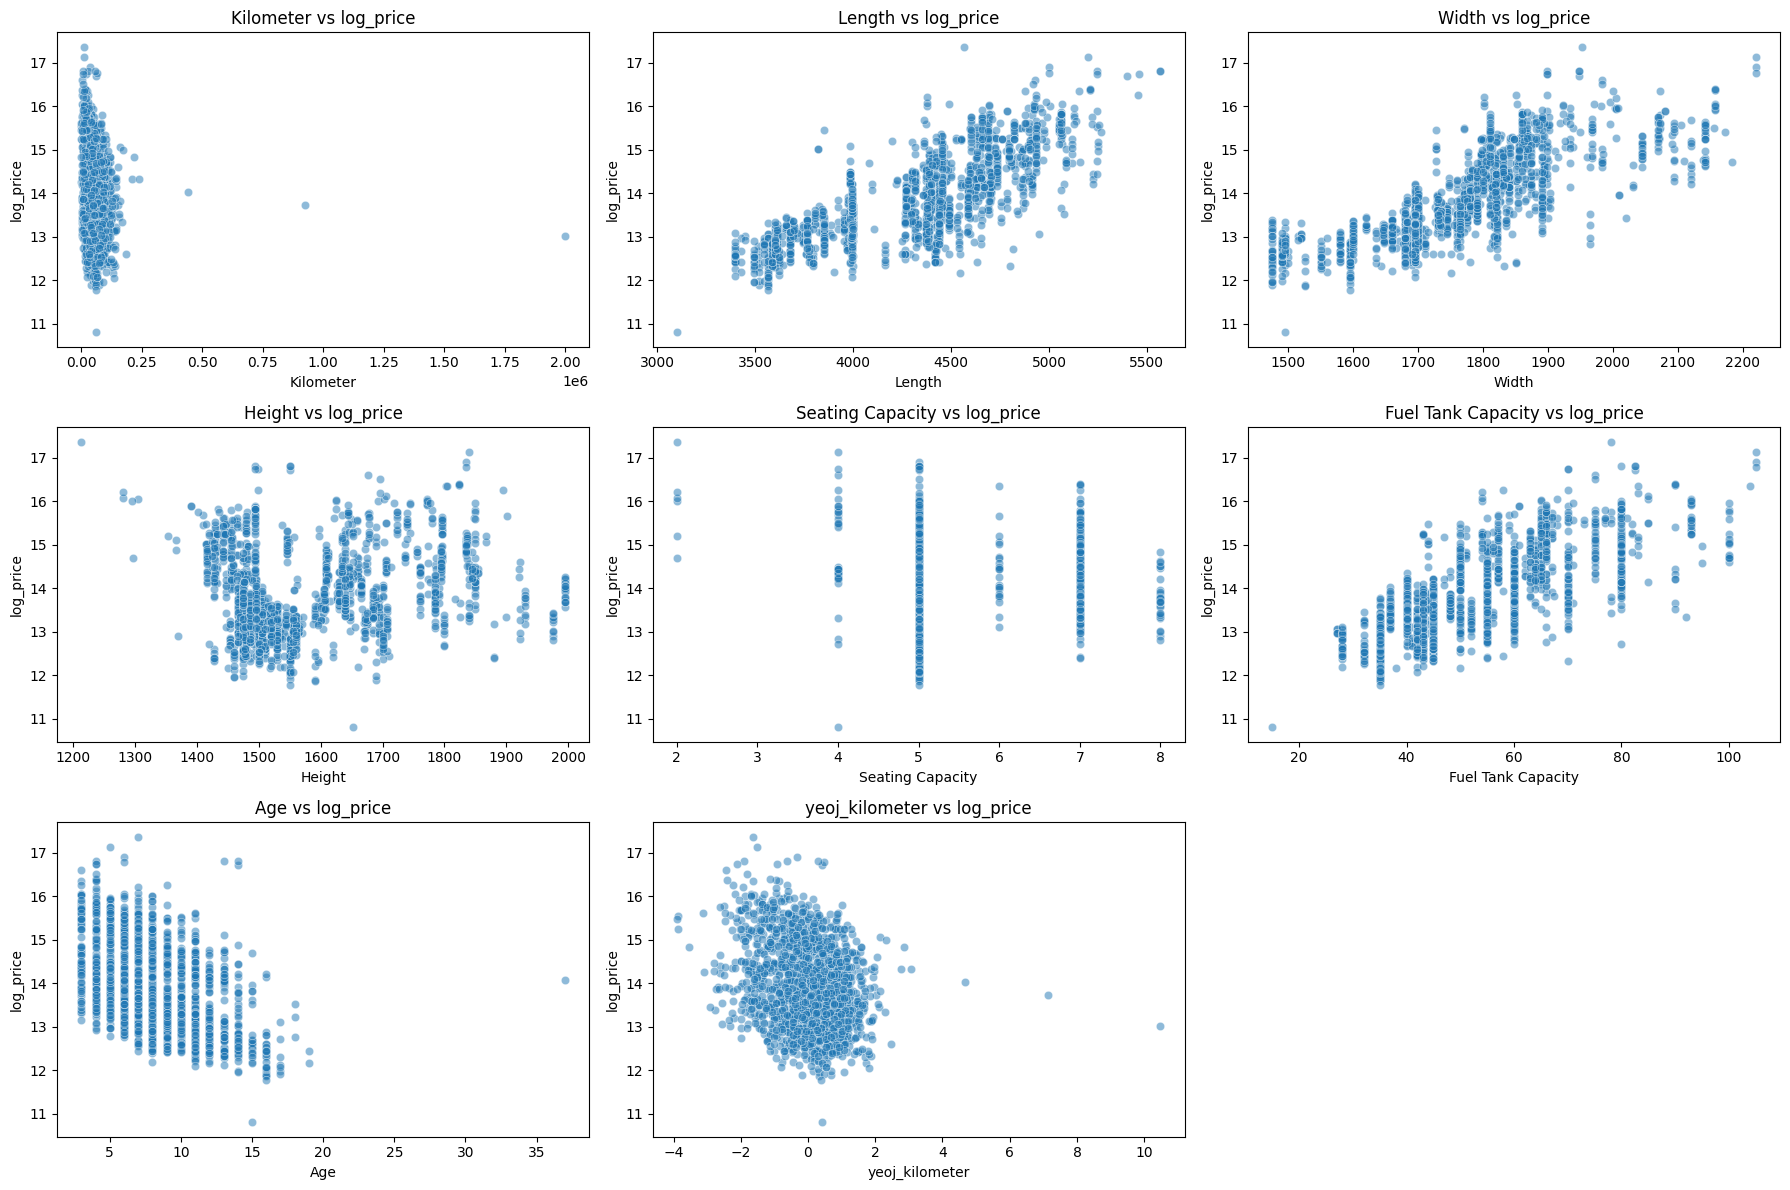

In [51]:
# Selecionando colunas num√©ricas (exceto Price e log_price)
numeric_cols = df_car.select_dtypes(include='number').columns.drop(['Price', 'log_price'], errors='ignore')

# Definindo n√∫mero de colunas por linha
cols_per_row = 3
num_plots = len(numeric_cols)
num_rows = -(-num_plots // cols_per_row)  # ceil division

# Criando figura e subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, num_rows * 4))
axes = axes.flatten()

# Gerando os gr√°ficos
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df_car, x=col, y='log_price', ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{col} vs log_price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('log_price')

# Apagando subplots extras (caso o n√∫mero de vari√°veis n√£o seja m√∫ltiplo de 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **Quest√£o 9**
Crie um modelo de Regress√£o Linear Simples, exiba a Tabela de Regress√£o e exiba o plot da Reta Estimada.

In [59]:
# Vari√°veis independentes e dependente
X = df_car[['Fuel Tank Capacity']]
X = sm.add_constant(X)  # adiciona constante (intercepto)
y = df_car['log_price']

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Exibindo o resumo da regress√£o
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 05 May 2025   Prob (F-statistic):          2.47e-323
Time:                        23:04:56   Log-Likelihood:                -1832.1
No. Observations:                1874   AIC:                             3668.
Df Residuals:                    1872   BIC:                             3679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.4063      0

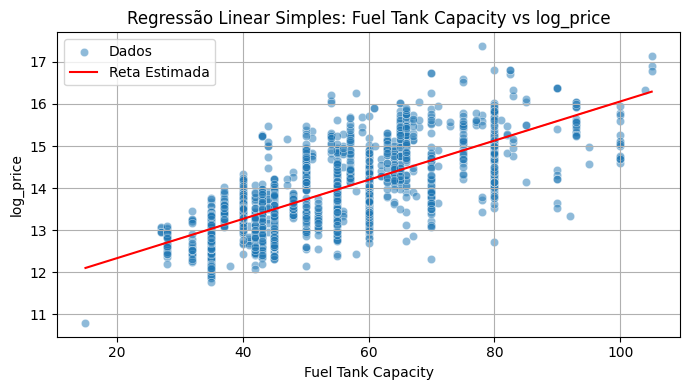

In [61]:
# Plot da reta ajustada
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df_car['Fuel Tank Capacity'], y=df_car['log_price'], alpha=0.5, label='Dados')
sns.lineplot(x=df_car['Fuel Tank Capacity'], y=model.fittedvalues, color='red', label='Reta Estimada')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('log_price')
plt.title('Regress√£o Linear Simples: Fuel Tank Capacity vs log_price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Quest√£o 10**

Codifique e exiba o gr√°fico dos res√≠duos do modelo de Regress√£o Simples

In [63]:
# Calcular res√≠duos
residuals = model.resid
fitted = model.fittedvalues

# Plot dos res√≠duos
plt.figure(figsize=(7, 4))
sns.scatterplot(x=fitted, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (Fitted)')
plt.ylabel('Res√≠duos')
plt.title('Gr√°fico de Res√≠duos - Regress√£o Linear Simples')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Quest√£o 11**

. Crie um modelo de Regress√£o Multivariada, exiba a Tabela de Regress√£o e exiba o gr√°fico dos res√≠duos do modelo

In [65]:
# Selecionando vari√°veis explicativas
X_multi = df_car[['Kilometer', 'Fuel Tank Capacity', 'Age']]  # voc√™ pode adicionar mais colunas aqui
X_multi = sm.add_constant(X_multi)

# Vari√°vel dependente
y_multi = df_car['log_price']

# Ajuste do modelo
multi_model = sm.OLS(y_multi, X_multi).fit()

# Resumo do modelo
print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1941.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:09:23   Log-Likelihood:                -1246.8
No. Observations:                1874   AIC:                             2502.
Df Residuals:                    1870   BIC:                             2524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.6139      0

In [66]:
# Res√≠duos e valores ajustados
residuals_multi = multi_model.resid
fitted_multi = multi_model.fittedvalues

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_multi, y=residuals_multi, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (Fitted)')
plt.ylabel('Res√≠duos')
plt.title('Gr√°fico de Res√≠duos - Regress√£o Linear M√∫ltipla')
plt.grid(True)
plt.tight_layout()
plt.show()
